In [220]:
# library(ggVennDiagram)
# library(performance)
# library(microbiome)
# library(genefilter)
# library(phyloseq)
# library(rstatix)
# library(stringr)
# library(ggpmisc)
# library(tibble)
# library(dplyr)
# library(vegan)
# library(gvlma)
#https://www.yanh.org/2021/01/01/microbiome-r/
#https://github.com/erictleung/phyloseq-cheatsheet
#http://deneflab.github.io/MicrobeMiseq/demos/mothur_2_phyloseq.html
#https://rstudio-pubs-static.s3.amazonaws.com/330760_8bba830836324bf6b100d4e76f49e3d2.html
#https://micca.readthedocs.io/en/latest/phyloseq.html
#https://www.bioconductor.org/packages/release/bioc/vignettes/phyloseq/inst/doc/phyloseq-analysis.html

In [ ]:
metadata_Rew <- read.table(file = "R files/Carbon_analysis/sample-metadata3.txt", sep = "\t", header =  T, skip = 1)

In [310]:
xtabs(~ sample_ID, data = metadata_Rew)

sample_ID
LWR_MN1 LWR_MN2 LWR_MN3 LWR_MN4 LWR_MN5 LWR_SG1 LWR_SG2 LWR_SG3 LWR_SG4 LWR_SG5 
      6       6       6       6       6       6       6       6       6       6 
LWR_SM1 LWR_SM2 LWR_SM3 LWR_SM4 LWR_SM5 MID_MN1 MID_MN2 MID_MN3 MID_MN4 MID_MN5 
      6       6       6       6       6       3       3       3       3       3 
MID_SG1 MID_SG2 MID_SG3 MID_SG4 MID_SG5 MID_SM1 MID_SM2 MID_SM3 MID_SM4 MID_SM5 
      3       3       3       3       3       3       3       3       3       3 

In [289]:
#The first line has column numbers so we use skip =1  to skip that line
#remember to check your sample numbers 
metadata_raw <- read.table(file = "R files/Carbon_analysis/sample-metadata3.txt", sep = "\t", header =  T, skip = 1)%>%
             mutate(sample_ref = sample.id) %>%  
             tidyr::separate(sample_ref, into = c("read_prefix", "Sample_ID"," replicate_id"), sep =  "[.]") %>%
             mutate_if(is.character, as.factor) %>%
             mutate(Sample_ID = as.factor(stringi::stri_replace_last_fixed(Sample_ID, "_", "")))

In [314]:
#Take note of the difference in number of samples
xtabs(~ Sample_ID, data = metadata_raw)

Sample_ID
LWR_MN1 LWR_MN2 LWR_MN3 LWR_MN4 LWR_MN5 LWR_SG1 LWR_SG2 LWR_SG3 LWR_SG4 LWR_SG5 
      3       3       3       3       3       3       3       3       3       3 
LWR_SM1 LWR_SM2 LWR_SM3 LWR_SM4 LWR_SM5 MID_MN1 MID_MN2 MID_MN3 MID_MN4 MID_MN5 
      3       3       3       3       3       3       3       3       3       3 
MID_SG1 MID_SG2 MID_SG3 MID_SG4 MID_SG5 MID_SM1 MID_SM2 MID_SM3 MID_SM4 MID_SM5 
      3       3       3       3       3       3       3       3       3       3 
UPR_MN1 UPR_MN2 UPR_MN3 UPR_MN4 UPR_MN5 UPR_SG1 UPR_SG2 UPR_SG3 UPR_SG4 UPR_SG5 
      3       3       3       3       3       3       3       3       3       3 
UPR_SM1 UPR_SM2 UPR_SM3 UPR_SM4 UPR_SM5 
      3       3       3       3       3 

In [316]:
metadata3 <- metadata_raw %>% dplyr::select(sample.id, Sample_ID)
rownames(metadata3) <- metadata3$sample.id
sample_n(metadata3, 5)

,sample.id,Sample_ID
,<fct>,<fct>
RemovePrimer_Final.UPR_MN_3.1,RemovePrimer_Final.UPR_MN_3.1,UPR_MN3
RemovePrimer_Final.MID_SM_2.3,RemovePrimer_Final.MID_SM_2.3,MID_SM2
RemovePrimer_Final.MID_MN_5.1,RemovePrimer_Final.MID_MN_5.1,MID_MN5
RemovePrimer_Final.LWR_SG_2.2,RemovePrimer_Final.LWR_SG_2.2,LWR_SG2
RemovePrimer_Final.LWR_MN_1.1,RemovePrimer_Final.LWR_MN_1.1,LWR_MN1


In [317]:
otu <- read.table(file = "feature-table.tsv", sep = "\t", header = T, row.names = 1, skip = 1, comment.char = "")

In [318]:
taxonomy_raw <- read.table(file = "taxonomy.tsv", sep = "\t", header = T ,row.names = 1)

In [319]:
tax <- taxonomy_raw %>% 
       tidyr::separate(Taxon, c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"), sep = "; ") %>%
       dplyr::mutate(across(1:7, ~ stringr::str_replace_all(.x, "^[dkpcofgs]__",""))) %>%
       dplyr::select(1:7)

Warning message:
"Expected 7 pieces. Missing pieces filled with `NA` in 18661 rows [1, 2, 5, 6, 8, 9, 11, 12, 14, 15, 16, 21, 22, 24, 25, 30, 31, 32, 33, 34, ...]."


In [320]:
OTU <- otu_table(as.matrix(otu), taxa_are_rows = TRUE)
TAX <- tax_table(as.matrix(tax))
SAMPLE <- sample_data(metadata3)
TREE <- read_tree("tree.nwk")

In [321]:
#https://bioconductor.org/packages/release/bioc/vignettes/phyloseq/inst/doc/phyloseq-basics.html
(ps <- phyloseq(OTU, TAX, SAMPLE,TREE))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 48190 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 2 sample variables ]
tax_table()   Taxonomy Table:    [ 48190 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 48190 tips and 48077 internal nodes ]

In [322]:
#Assumes reads have been normalised
#merge replicates by summing up all readcounts data for the given category
#The step converts factors into numericals if need the labels they should be put in the blue carbon data
#total ASV/taxa and reads remains the same
(merged_ps <- merge_samples(ps, "Sample_ID"))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 48190 taxa and 45 samples ]
sample_data() Sample Data:       [ 45 samples by 2 sample variables ]
tax_table()   Taxonomy Table:    [ 48190 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 48190 tips and 48077 internal nodes ]

In [258]:
sample_data(merged_ps)$Sample_ID <- row.names(sample_data(merged_ps))

In [298]:
#read in the blue carbon data
#the locale part convert commas to points my system was complaining
carbon_data <- readr::read_delim("R files/Carbon_analysis/Sediment_Samples_masses.csv",
               delim = ";",
               locale = readr::locale(decimal_mark = ",")) %>% 
               #convert into a basic data.frame so that we can assign rownames
               data.frame() %>%
               mutate_if(is.character,as.factor)
row.names(carbon_data) <- carbon_data$Sample_ID
head(carbon_data)

Rows: 45 Columns: 15
-- Column specification -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ";"
chr  (3): Sample_ID, ecosystem, reach
dbl (12): Sample_Number, Dish_mass, wet_volume_ml, Wet_mass, Dry_mass,  Wate...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


,Sample_Number,Sample_ID,ecosystem,reach,Dish_mass,wet_volume_ml,Wet_mass,Dry_mass,X.Water_lost.,Dry_sediment,Dry_bulk_denisty,C_percent,soil_carbon_density,carbon_in_core,Total_core_carbon
,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LWR_MN1,1,LWR_MN1,Mangrove,Lower,47.622,20,86.147,76.943,9.204,29.321,1.46605,0.62,0.00908951,0.04544755,15.082560
LWR_MN2,2,LWR_MN2,Mangrove,Lower,47.343,20,85.034,76.522,8.512,29.179,1.45895,1.01,0.01473540,0.07367698,16.180257
LWR_MN3,3,LWR_MN3,Mangrove,Lower,47.406,20,79.452,68.110,11.342,20.704,1.03520,1.43,0.01480336,0.07401680,19.731470
LWR_MN4,4,LWR_MN4,Mangrove,Lower,47.827,20,84.567,75.811,8.756,27.984,1.39920,1.23,0.01721016,0.08605080,12.538343
LWR_MN5,5,LWR_MN5,Mangrove,Lower,47.361,20,83.542,73.940,9.602,26.579,1.32895,1.57,0.02086452,0.10432258,11.510520
LWR_SG1,6,LWR_SG1,Seagrass,Lower,47.561,20,87.818,78.983,8.835,31.422,1.57110,1.92,0.03016512,0.15082560,4.544755


In [299]:
#vegan expect sample as row and otu/asv as columns
#transpose the table so samples can be rows and asv are columns
#shannon is default
shannondiv <- vegan::diversity(otu_table(merged_ps)) %>%
              data.frame() %>%
              `colnames<-`(c("shannon")) %>%
              tibble::rownames_to_column(var = "Sample_ID")
#can also run the simpson's diversity which is easier to interpret
simpsondiv <- vegan::diversity(otu_table(merged_ps), index = "simpson") %>%
              data.frame() %>%
              `colnames<-`(c("simpson")) %>%
              tibble::rownames_to_column(var = "Sample_ID")

In [300]:
#create a new metadatable with diversity indexes and other metadata
carbon_metadata_div <- carbon_data %>%
                       left_join(shannondiv) %>%
                       left_join(simpsondiv)

Joining with `by = join_by(Sample_ID)`
Joining with `by = join_by(Sample_ID)`


In [301]:
dim(carbon_metadata_div)

[1] 45 17

In [328]:
colnames(carbon_metadata_div)

[1] "Sample_Number"       "Sample_ID"           "ecosystem"          
 [4] "reach"               "Dish_mass"           "wet_volume_ml"      
 [7] "Wet_mass"            "Dry_mass"            "X.Water_lost."      
[10] "Dry_sediment"        "Dry_bulk_denisty"    "C_percent"          
[13] "soil_carbon_density" "carbon_in_core"      "Total_core_carbon"  
[16] "shannon"             "simpson"

In [329]:
#check for correlation
carbon_metadata_div %>%
dplyr::group_by(ecosystem) %>%
rstatix::cor_test(simpson, C_percent, Dry_bulk_denisty, method = "spearman")

ecosystem,var1,var2,cor,statistic,p,method
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Mangrove,simpson,simpson,1.000,1.243450e-13,0.00e+00,Spearman
Saltmarsh,simpson,simpson,1.000,1.243450e-13,0.00e+00,Spearman
Seagrass,simpson,simpson,1.000,1.243450e-13,0.00e+00,Spearman
Mangrove,simpson,C_percent,0.029,5.440000e+02,9.23e-01,Spearman
Saltmarsh,simpson,C_percent,-0.400,7.820000e+02,1.45e-01,Spearman
Seagrass,simpson,C_percent,0.150,4.787822e+02,6.06e-01,Spearman
Mangrove,simpson,Dry_bulk_denisty,0.089,5.100000e+02,7.53e-01,Spearman
Saltmarsh,simpson,Dry_bulk_denisty,0.560,2.480000e+02,3.36e-02,Spearman
Seagrass,simpson,Dry_bulk_denisty,0.500,2.800000e+02,6.02e-02,Spearman


`geom_smooth()` using formula = 'y ~ x'


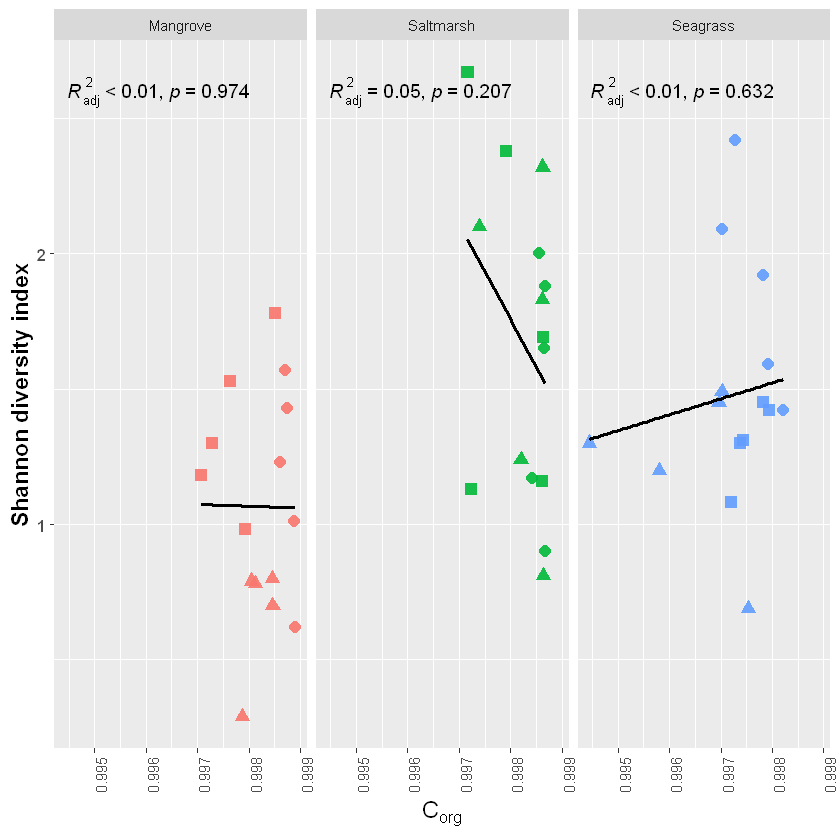

In [331]:
carbon_metadata_div %>%
ggplot(aes(x = simpson, y = C_percent)) + 
  geom_point(aes(color = ecosystem, shape = reach),size = 3, alpha = 0.9, stroke = 0.6) + 
  geom_smooth(method = "lm", se= FALSE, color = "black") + 
  ggpmisc::stat_poly_eq(use_label(c("adj.R2", "p")), 
                        label.y = "top", size = 4,
                        small.p = TRUE) + 
  labs(y = "Shannon diversity index", x = expression(C[org])) +
  theme(legend.position = "none",
        axis.title=element_text(size=14,face="bold"),
        axis.text.y = element_text(size=10,face="bold"),
        axis.text.x = element_text(angle = 90)) +
        facet_grid(~ecosystem)

`geom_smooth()` using formula = 'y ~ x'


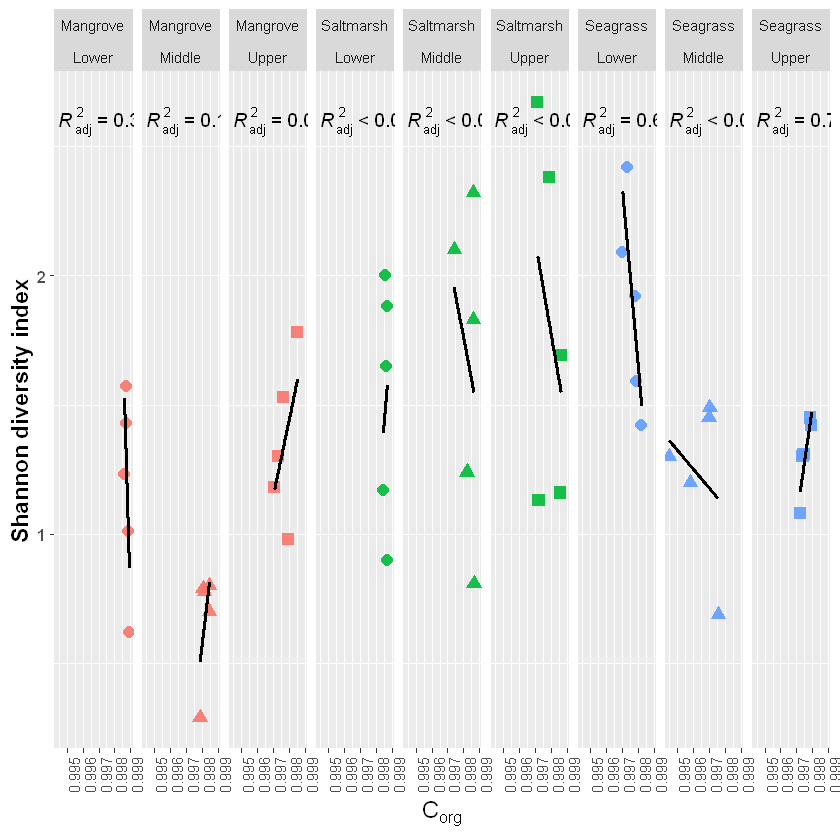

In [330]:
carbon_metadata_div %>%
ggplot(aes(x = simpson, y = C_percent)) + 
  geom_point(aes(color = ecosystem, shape = reach),size = 3, alpha = 0.9, stroke = 0.6) + 
  geom_smooth(method = "lm", se= FALSE, color = "black") + 
  ggpmisc::stat_poly_eq(use_label(c("adj.R2", "p")), 
                        label.y = "top", size = 4,
                        small.p = TRUE) + 
  labs(y = "Shannon diversity index", x = expression(C[org])) +
  theme(legend.position = "none",
        axis.title=element_text(size=14,face="bold"),
        axis.text.y = element_text(size=10,face="bold"),
        axis.text.x = element_text(angle = 90)) +
        facet_grid(~ecosystem + reach)